In [2]:
!pip install git+https://github.com/ficstamas/FateML.git
!pip install --upgrade scikit-learn~=1.2.1

  Cloning https://github.com/ficstamas/FateML.git to c:\users\ftkni\appdata\local\temp\pip-req-build-000qeaux
  Resolved https://github.com/ficstamas/FateML.git to commit ba42c35b66aa3091e836123845ff19f36fb30c56
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ficstamas/FateML.git 'C:\Users\ftkni\AppData\Local\Temp\pip-req-build-000qeaux'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

# Dataset

This time for demonstrational purposes, we are going to rely on the [Fish Market Dataset](https://www.kaggle.com/aungpyaeap/fish-market). The dataset contains data about 159 fish, including their weight and dimensions. To understand what certain sizes mean, see the images below.

![Fish](https://github.com/ficstamas/FateML/raw/master/notebooks/images/fish_market_1.png)
![Fish](https://github.com/ficstamas/FateML/raw/master/notebooks/images/fish_market_2.png)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ficstamas/FateML/master/notebooks/data/fish_market.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df['Species'].unique()  # let's see the different species present in the dataset

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.dtypes  
# This time pandas was able to guess the data types of each column correctly because we don't have missing values

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
# this time we are going to make only the train and test split
train, test = train_test_split(df, train_size=0.7, random_state=0)

In [8]:
train.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,375.463964,25.456757,27.571171,30.383784,8.914588,4.318018
std,325.845227,9.562936,10.268782,11.182247,4.452920,1.717768
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,20.700000,22.500000,5.700150,3.308000
50%,272.000000,24.000000,26.500000,29.000000,7.820400,4.247600
75%,600.000000,32.150000,35.000000,39.350000,12.406050,5.324450
max,1250.000000,52.000000,56.000000,59.700000,18.957000,7.795700


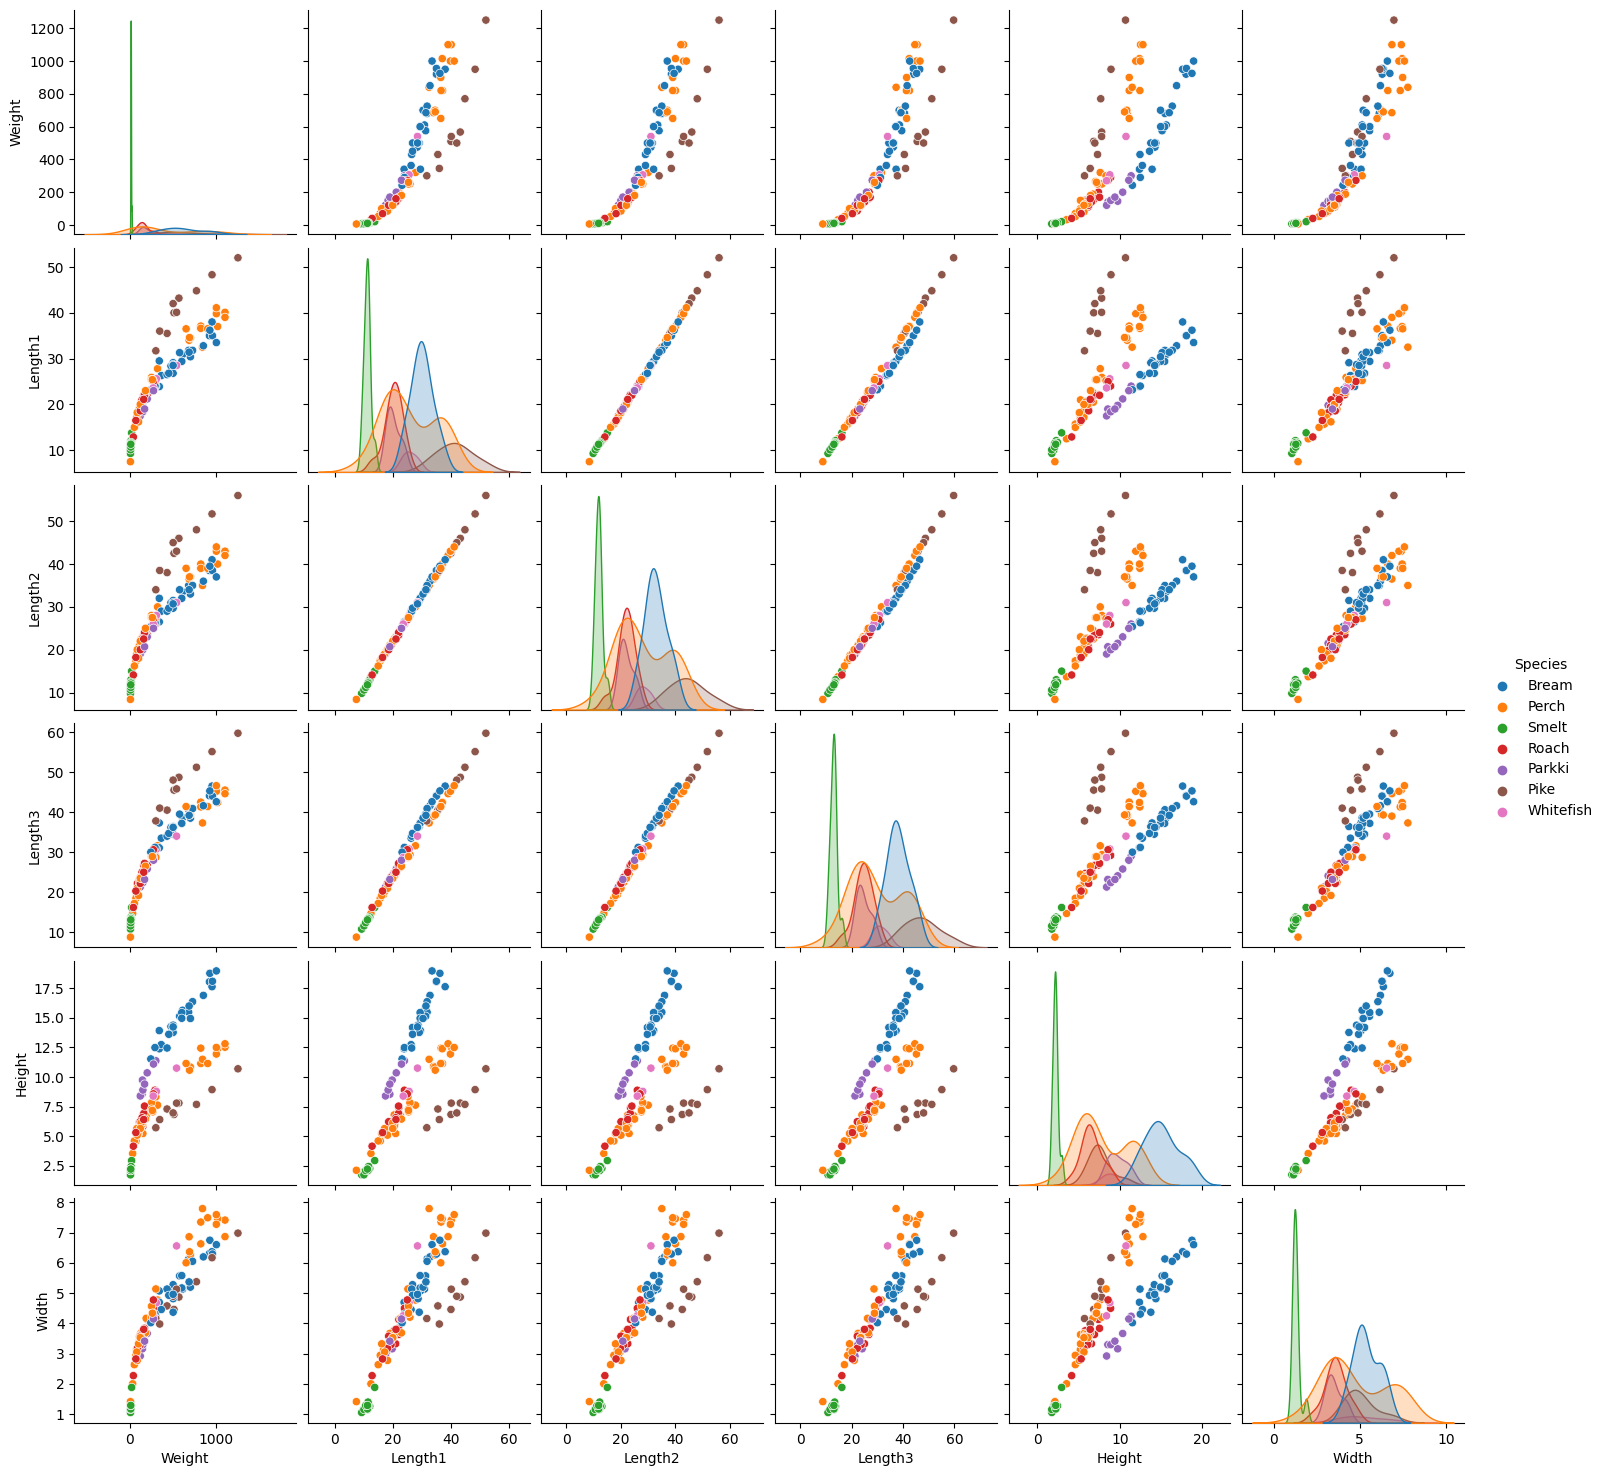

In [9]:
sns.pairplot(train, hue='Species')

# Regression vs Classification

**Regression and classification** are both types of supervised machine learning, but they are used for **different types of problems**.

**Regression** is used for **predicting a continuous value**, such as the price of a house or the temperature tomorrow. In a regression problem, the goal is to find a function that maps inputs to outputs, where the output is a continuous value.

**Classification**, on the other hand, is used for **predicting a discrete value**, such as whether an email is spam or not, or which type of animal is in an image. In a classification problem, the goal is to find a function that maps inputs to discrete outputs, also called labels.

During **regression** our **target variable** is the **Weight**, and during **classification** our target variable is the **Species**.

| Target | Features |
| --- | --- |
| $y$ | $X$ |
| Dependent | Independent |
| Outcome | Design |
| Endogenous | Exogenous |

# Linear Regression

The basic idea behind linear regression is to find the line of best fit that minimizes the difference between the predicted values and the actual values. This line is represented by an equation of the form:

$$y^{(i)}=\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)}=\beta_0+\overline{\beta}X$$

where $y^{(i)}$ is the dependent variable, $\beta_j$ is the slope of the line, $x_j^{(i)}$ is the independent variable, and $\beta_0$ is the intercept. $i$ represents a datapoint and $j$ is a feature.

It can be solved using closed form solution or optimization algorithms like gradient descent.
The closed form solution is a mathematical formula that gives the exact solution for the line of best fit, while optimization algorithms are iterative methods that find an approximate solution.

It's **important** to note that **linear regression** assumes a **linear relationship between the independent and dependent variables**, so it may not be appropriate for certain types of data.

In [10]:
from fateml.data.fishmarket import prepare_for_regression

# splits has the following fields: train_x, train_y, dev_x, dev_y, test_x, test_y, other
# during these experiments we are going to use the train and test splits, dev is not even populated
splits = prepare_for_regression(df, standardize=False, statsmodels_format=True)

Linear Regression vizualized in 2D for with 1 feature. Assuming that we have 1 feature (Width) and pedicting the same target variable (Weight). In higher dimensions visualization becomes complicated.

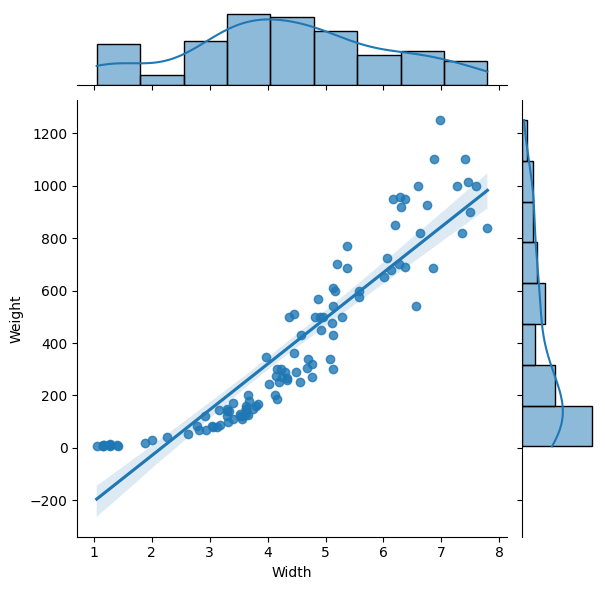

In [17]:
sns.jointplot(data=pd.concat([splits.train_x, splits.train_y], axis=1), x="Width", y="Weight", kind="reg")

In [6]:
# model
import statsmodels.api as sm

lr_model = sm.OLS(splits.train_y, splits.train_x)
model = lr_model.fit()  # fitting the model

y_pred = model.predict(splits.test_x)  # evaluating the model

Now that we have a trained model, we can investigate what the model has learned by analyzing the weights. Later we are going to have a look at the performance as well.

In [7]:
model.params

Bream       -254.503749
Height        55.702739
Length1      -43.171910
Length2       87.345571
Length3      -34.174025
Parkki        -4.723804
Perch        -65.162464
Pike         251.116389
Roach       -211.124399
Smelt       -176.700565
Whitefish    -73.413378
Width         52.981867
const       -534.511971
dtype: float64

With a linear model, it is relatively easy to interpret the internal weights or parameters (also called coefficients or betas) because they have a direct relationship with the input features. In a linear model, the internal part of the summation ($\beta_jx_j^{(i)}$) represents a linear combination of the input features ($x_j^{(i)}$) and their corresponding weights or parameters ($\beta_j$). The weights can be thought of as the importance or contribution of each input feature to the final prediction. Positive weights indicate that the feature has a positive correlation with the target variable, while negative weights indicate a negative correlation.

So what happens when we increase the value of the `Height` (denote it as $h$) feature by 1?
$$\beta_hx_h^{(i)}\xrightarrow{+1}\beta_h(1+x_h^{(i)})=\beta_h + \beta_hx_h^{(i)}$$
If we increase the value by 1 then the prediction increases by $\beta_h$.

Let's see it in practice:

In [12]:
datapoint = splits.test_x.iloc[:1].copy()
datapoint

,Bream,Height,Length1,Length2,Length3,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Width,const
7,1.0,12.67,27.6,30.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,4.69,1.0


In [13]:
datapoint['Height'][7] = datapoint['Height'][7] + 1
datapoint

,Bream,Height,Length1,Length2,Length3,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Width,const
7,1.0,13.67,27.6,30.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,4.69,1.0


In [14]:
# original prediction
model.predict(splits.test_x.iloc[:1])

7    397.954484
dtype: float64

In [15]:
# new prediction with the increased value
model.predict(datapoint)

7    453.657223
dtype: float64

In [16]:
# original prediction + beta_height
model.predict(splits.test_x.iloc[:1])[7] + model.params['Height']

453.6572233565757

What happens if we change a One-hot encoded category? 

For example, if a datapoint is one-hot encoded as a "Whitefish" but it is later identified as a "Pike".

`statsmodels` module provides several metrics to analyze our model, let's have a look at them:

In [17]:
model.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.91e-59
Time:                        17:59:56   Log-Likelihood:                -633.49
No. Observations:                 111   AIC:                             1291.
Df Residuals:                      99   BIC:                             1324.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bream       -254.5037     89.166     -2.854      0.005    -431.429     -77.578
Height        55.7027     13.663      4.077      0.000      28.592      82.813
Length1      -43.1719     38.954     -1.108      0.270    -120.464      34.120
Length2       87.3456     46.800      1.866      0.065      -5.517     180.208
Length3      -34.1740     32.001     -1.068      0.288     -97.671      29.323
Parkki        -4.7238     82.001     -0.058      0.954    -167.432     157.984
Perch        -65.1625     25.041     -2.602      0.011    -114.850     -15.475
Pike         251.1164     37.553      6.687      0.000     176.604     325.629
Roach       -211.1244     44.656     -4.728      0.000    -299.733    -122.516
Smelt       -176.7006     44.823     -3.942      0.000    -265.640     -87.761
Whitefish    -73.4134     38.096     -1.927      0.057    -149.005       2.178
Width         52.9819     23.951      2.212      0.029       5.459     100.505
const       -534.5120     53.410    -10.008      0.000    -640.488    -428.536
==============================================================================
Omnibus:                       29.632   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.911
Skew:                           1.084   Prob(JB):                     1.61e-13
Kurtosis:                       5.835   Cond. No.                     5.79e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model:
- **Dep. Variable**: Target variable
- **Model**: The name of the model that was used. Ordinary Least Squares (OLS) in this case
- **Method**: The estimation method that was used.
- **No. Observations**: The number of observations used in the model.
- **Df Residuals**: The degrees of freedom of the residuals (the difference between the observed and predicted values). In brief, the residual degrees of freedom are the remaining "dimensions" that you could use to generate a new data set that "looks" like your current data set
- **Df Model**: The degrees of freedom of the model, which is the number of independent variables used in the model.
- $R^2$: The coefficient of determination, which is a measure of how well the model fits the data.
- **Adj** $R^2$: The adjusted coefficient of determination, which adjusts for the number of independent variables used in the model.
- **F-statistic**: The F-statistic, which is a measure of the overall significance of the model. A high F-statistic indicates that the model is a good fit for the data.
- **Prob (F-statistic)**:  The probability that the F-statistic would be as extreme or more extreme than the observed value if the null hypothesis of no relationship between the independent variables and the dependent variable were true.
- **Log-Likelihood**: The log-likelihood of the model.
- **AIC**: The Akaike Information Criterion, which is a measure of the relative quality of a statistical model, where lower values indicate a better fit. More features we assign to the model the more it punishes it.
- **BIC**: The Bayesian Information Criterion, which is similar to AIC but places more emphasis on models with fewer parameters

Features:
- **coef**: The coefficients (also known as weights or parameters) of the independent variables in the model.
- **std err**: The standard error of the coefficients, which is a measure of the uncertainty of the estimates.
- **t**: The t-statistic, which is the ratio of the coefficient to its standard error.
- $P>|t|$: The p-value, which is the probability of getting a t-statistic as extreme or more extreme than the observed value if the null hypothesis of no relationship between the independent variable and the dependent variable were true.
- \[0.025 , 0.975\]: The lower and upper bounds of the 95% confidence interval for the coefficient.

More statistics:
- **Omnibus**: Measure of the overall normality\* of the residuals. The Omnibus test statistic is calculated using the skewness and kurtosis of the residuals, which are measures of the shape of the residual distribution. The Omnibus test statistic is then used to calculate a p-value, which is a measure of the probability that the residuals are normally distributed.
- **Prob(Omnibus)**: A low p-value (typically below 0.05) indicates that the residuals are not normally distributed, which could indicate a problem with the model or the data. The presence of non-normality in residuals can be a sign of outliers, non-linearity, heteroscedasticity or other issues that could affect the model's performance.
- **Skew**: Skewness describes the degree of asymmetry of a probability distribution compared to a normal distribution.
- **Kurtosis**: Describes the peakedness or flatness of a probability distribution compared to a normal distribution.
- **Durbin-Watson**: A test statistic used to detect the presence of autocorrelation in the residuals of a linear regression model. Autocorrelation occurs when the residuals at one time point are related to the residuals at another time point. The Durbin-Watson statistic is a value between 0 and 4, with values closer to 2 indicating the absence of autocorrelation and values farther away from 2 indicating the presence of autocorrelation. If autocorrelation is detected in the residuals, it may indicate that the model is not correctly capturing the underlying patterns in the data.
- **Jarque-Bera (JB) és Prob(JB)**: A test statistic used to test for normality\* of the residuals in a linear regression model.
- **Cond. No.**: Condition Number is a measure of the sensitivity of the solution to small changes in the data or model parameters. It is a measure of the condition of the matrix of the independent variables, and a high condition number indicates that the matrix is ill-conditioned and the solution is sensitive to small changes in the data or model parameters.

\*It's important to note that a normal distribution of residuals doesn't always imply a good fit, but it's a necessary condition for many statistical tests and assumptions to hold.

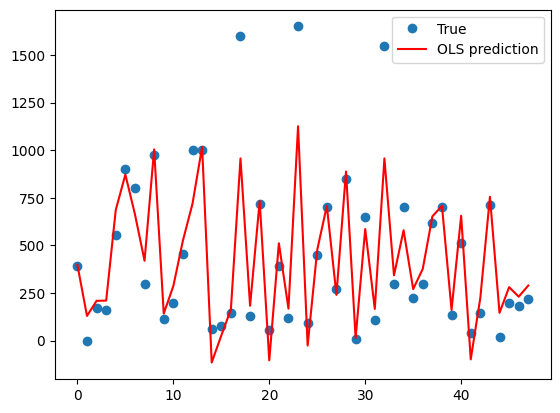

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.arange(len(splits.test_x))

ax.plot(x, splits.test_y['Weight'].tolist(), "o", label="True")
ax.plot(x, model.predict(splits.test_x).tolist(), "r", label="OLS prediction")

ax.legend(loc="best")

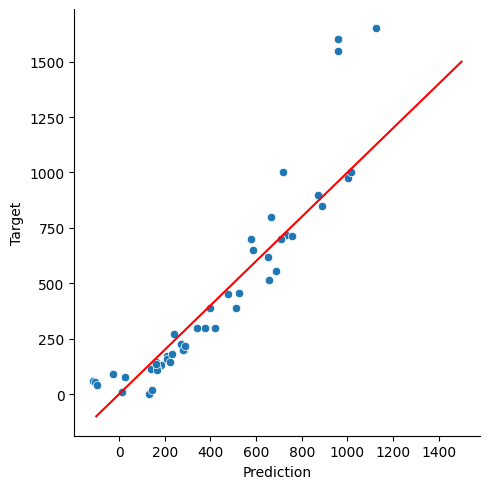

In [18]:
conp_df = pd.DataFrame({"Prediction": y_pred.values, "Target": splits.test_y['Weight'].values})
sns.relplot(kind="scatter", data=conp_df, x="Prediction", y="Target")
plt.plot([-100, 1500], [-100, 1500], color="red")

## $R^2$ metric

The R-squared ($R^2$) metric is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a linear regression model. Ideally, it is a value between 0 and 1, with higher values indicating a better fit of the model to the data.

$R^2$ is calculated as the ratio of the explained variation to the total variation in the dependent variable. The explained variation is the variation of the predicted values (from the model) and the total variation is the variation of the actual values of the dependent variable.

In other words, $R^2$ measures the proportion of the variance in the dependent variable that can be explained by the independent variables and it's defined as:

$$R^2=1-\frac{SSE}{SST}$$
Sum of Squered Errors (SSE): 
$$SSE=\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2,$$
$y^{(i)}$ dependent variable, and $\hat{y}^{(i)}$ is the prediction.
Sum of Squered Totals (SST):
$$SST=\sum_{i=1}^n(y^{(i)}-\overline{y}^{(i)})^2,$$
$\overline{y}^{(i)}$ denotes the expected value of the dependent variable of the data.

SSE expresses the variance of the model and SST defince the overall variance of the data.

Possible values:
- 0 $→$ couldn't fit a model at all
- 1 $→$ perfect fit
- negative value $→$ the model was not able to define the trend in the dataset

In [56]:
true_values = splits.test_y.values.flatten()
predicted_values = y_pred.values

SSE = np.sum((true_values - predicted_values)**2)
SST = np.sum((true_values - np.mean(true_values))**2)
1 - SSE/SST

0.8315527837143376

In [57]:
from sklearn.metrics import r2_score

r2_score(splits.test_y, y_pred)

0.8315527837143376

In [21]:
r2_score([3, 2, 1], [2, 1, 1])

0.0

In [22]:
r2_score([3, 2, 1], [1, 2, 3])

-3.0

However, regular R-squered score has its drawbacks:

1. The **regular R-squared score increases as the number of independent variables in the model increases**, even if those variables do not improve the model's ability to predict the dependent variable. The adjusted R-squared score accounts for this by adjusting the R-squared score based on the number of independent variables in the model.

2. The **regular R-squared score can be misleading when comparing models with different numbers of independent variables**. The adjusted R-squared score allows for a fair comparison of models with different numbers of independent variables.

$$\overline{R}^2=1-(1-R^2)\frac{n-1}{n-p-1},$$
$n$ denotes the number of datapoints and $p$ is the number of independent variables.

In conclusion, the adjusted R-squared score is a more reliable measure of the goodness of fit of a regression model and should be used when comparing models with different numbers of independent variables or when interpreting the overall predictive power of a model.

In [19]:
from sklearn.metrics import r2_score

def r2_adj(true_vals, predictions, num_features):
    norm_term = ((len(true_vals)-1)/(len(true_vals)-num_features-1))
    score = 1 - r2_score(true_vals, predictions)
    return 1 - score * norm_term

r2_adj(splits.test_y, y_pred, len(model.params))

0.7671464951345255

## Feature importance

The importance of a feature can be defined as the absolute value of its t-statistics:
$$\mathcal{I}_{\hat{\beta}_j}=\left|\frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}\right|,$$
$SE$ denotes the standard error.

We know that $\beta_j$ assigns a proportional contribution to our prediction which can be seen as the importance of that feature, and the standard error defines the uncertainity (variance) of that prediction. Let's see an example: if you need an immiadiate hearth transplant (high coefficient) but the only available person in the building is the janitor (low certainity or high variance), would you accept the outcome?

### Calculating the standard error and t-statistics

In [61]:
n = splits.train_x.shape[0]  # number of samples
y_hat = model.predict(splits.train_x)  # predictions 

sse = np.sum((splits.train_y.values.squeeze() - y_hat.values)**2)  # error term

s2 = sse / (n - model.df_model - 1)

sigma = s2 * np.linalg.pinv(splits.train_x.values.T @ splits.train_x.values)  # covariance matrix
SEs = np.sqrt(np.diag(sigma))  # standard error (SE)

t_statistics = model.params / SEs  # t- statistics

t_statistics

Bream        -2.854255
Height        4.076851
Length1      -1.108293
Length2       1.866339
Length3      -1.067902
Parkki       -0.057607
Perch        -2.602191
Pike          6.687040
Roach        -4.727744
Smelt        -3.942143
Whitefish    -1.927037
Width         2.212130
const       -10.007790
dtype: float64

### Importance score

In [62]:
from fateml.utils.statsmodels import feature_importance

statistics = feature_importance(model.summary())
statistics

,features,standard error,beta hat,t statistics,feature importance
Bream,Bream,89.166,-254.5037,-2.854,2.854
Height,Height,13.663,55.7027,4.077,4.077
Length1,Length1,38.954,-43.1719,-1.108,1.108
Length2,Length2,46.800,87.3456,1.866,1.866
Length3,Length3,32.001,-34.1740,-1.068,1.068
Parkki,Parkki,82.001,-4.7238,-0.058,0.058
Perch,Perch,25.041,-65.1625,-2.602,2.602
Pike,Pike,37.553,251.1164,6.687,6.687
Roach,Roach,44.656,-211.1244,-4.728,4.728
Smelt,Smelt,44.823,-176.7006,-3.942,3.942


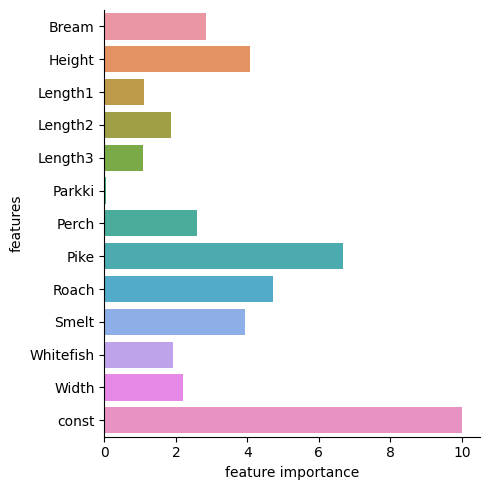

In [63]:
sns.catplot(kind="bar", data=statistics, x="feature importance", y='features', orient="h")

## Weight Plot

Weight plot visualizes the effect of each independent variable to the final contribution with a certain degree of variance.  The problem with the weight plot is that the features are measured on different scales. You can make it more comperable if you center and standardize the features before fitting the model.

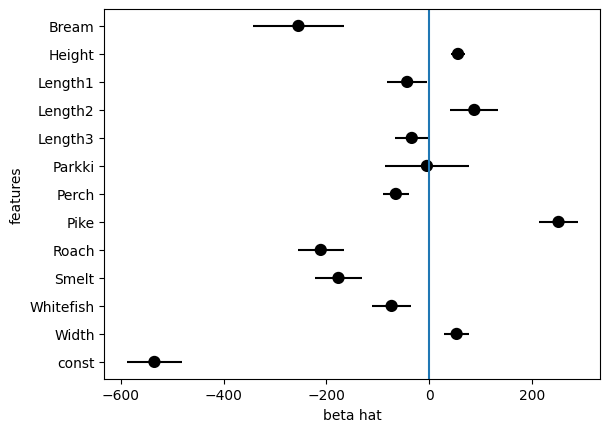

In [64]:
sns.pointplot(data=statistics[["features", "beta hat"]], x="beta hat", y="features", orient="h", join=False, color='black')
plt.errorbar(y=np.arange(len(statistics)),x=statistics["beta hat"], xerr=statistics["standard error"], fmt='none', c='black')
plt.axvline(x=0)

## Effect Plot

Effect of the model weights on the actual features:
$$effect^{(i)}_j=\beta_jx^{(i)}_j$$

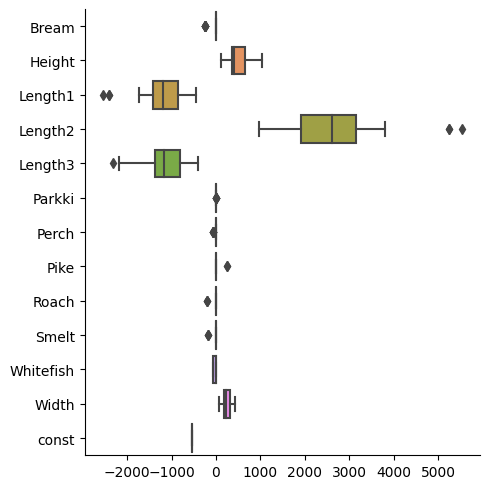

In [85]:
effect = splits.test_x * model.params
sns.catplot(kind="box", data=effect, orient="h")

# Lasso models

By increasing the number of independent variables (features) classical regression models become increasingly harder to interpretable. It is an ever occuring problem in real life scenarios. To alleviate this problem we are going to induce sparsity between the independent variables.

Lasso (sometimes also called as $\ell_1$ regularization) stands for “least absolute shrinkage and selection operator” which performs a feature selection inside the model. Classical linear optimization problem can be formulated as:

$$min_\beta\left(\frac{1}{n}\sum_{i=1}^n\left(y^{(y)}-\beta^tx\right)^2\right).$$

The $\ell_1$ regularization term is added to the cost function and it shrinks the less important feature's coefficient to zero thus, removing some features. This results in a sparse solution, where some of the feature coefficients are exactly equal to zero. This makes Lasso particularly useful for feature selection, as it automatically performs variable selection by setting some coefficients to zero. Thus our optimization problem looks like as:

$$min_\beta\left(\frac{1}{n}\sum_{i=1}^n\left(y^{(y)}-\beta^tx\right)^2+\lambda\|\beta\|_1\right),$$
where $\lambda$ controls the sparsity of the solution. As $\lambda$ increases so the sparsity in the model.


The main benefit of Lasso is that it helps to reduce overfitting. Overfitting occurs when a model is too complex, and it captures the noise in the data rather than the underlying trend. Lasso helps to overcome this problem by shrinking the coefficients of less important features to zero, effectively removing them from the model. Additionally, Lasso is also useful when you have a large number of correlated variables in your data, as it can select one variable from a group of highly correlated variables.

It is **important** to note that **Lasso is sensitive to the scale of the features**, therefore it is recommended to standardize the features before using them in a Lasso model.

In [86]:
from fateml.data.fishmarket import prepare_for_regression

# we load the dataset again but standardize hte parameters
splits = prepare_for_regression(df, standardize=True, statsmodels_format=True)

In [87]:
lasso = sm.OLS(splits.train_y, splits.train_x)
model = lasso.fit_regularized(method='sqrt_lasso', L1_wt=1, alpha=2.0)

y_pred = model.predict(splits.test_x)

In [88]:
model.params

Bream         -0.000013
Height        83.256696
Length1        0.000114
Length2      156.402720
Length3        0.000015
Parkki        -0.000001
Perch          5.831618
Pike         293.573156
Roach         -0.000005
Smelt         -0.000021
Whitefish     45.023254
Width        142.701141
const        326.179103
dtype: float64

In [89]:
from sklearn.metrics import r2_score

r2_score(splits.test_y, y_pred)

0.8577213331233251

In [90]:
r2_adj(splits.test_y, y_pred, len(model.params))

0.8033206663763612

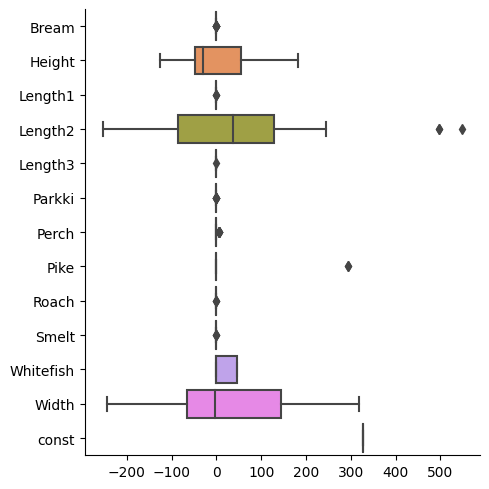

In [91]:
effect = splits.test_x * model.params
sns.catplot(kind="box", data=effect, orient="h")

__How the plots change if we standardize the dataset?__

# Logistic Regression

While linear regression cannot be used directly for classification, it can be adapted for classification by thresholding the predicted outcome. For example, if the predicted outcome is greater than a certain threshold, the model would predict one class, and if it is less than the threshold, it would predict the other class. The threshold is chosen based on the trade-off between sensitivity and specificity.

However, it would only interpolate the datapoints and it is not the best approach to solve the problem. Although we can fabricate a probabilistic distibution over our labels -- like in the example below -- it is highly sensitive for outliers as well. 

<img src='https://github.com/ficstamas/FateML/raw/master/notebooks/images/linear-class-threshold-1.png' width=500>

A better approach is to utilize a so called logit function:

<img src='https://github.com/ficstamas/FateML/raw/master/notebooks/images/logistic-class-threshold-1.png' width=500>

The logit function, also known as the logistic function, is a sigmoid function that maps any real-valued number to a value between 0 and 1. The logit function is defined as:
$$logit(x)=\frac{1}{1+e^{-x}}$$

Let's apply it on the output of the linear regression model which gives us the logistic regression model:
$$P(y^{(i)}=1)=\frac{1}{1+e^{-(\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)})}}$$

In [92]:
from fateml.data.fishmarket import prepare_for_classification
from fateml.data.utils import binarize_labels_in_splits

# we load the dataset again but standardize the parameters
splits = prepare_for_classification(df, standardize=True, statsmodels_format=True)
splits = binarize_labels_in_splits(splits, "Pike")  # We are going to predict whether it is a Pike or not

E:\Programs\conda\envs\FateML\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
import statsmodels.api as sm

logreg = sm.Logit(splits.train_y, splits.train_x)
model = logreg.fit(maxiter=100, method='lbfgs')

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pike   No. Observations:                  111
Model:                          Logit   Df Residuals:                      104
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Feb 2023   Pseudo R-squ.:                  0.9999
Time:                        18:29:08   Log-Likelihood:             -0.0020754
converged:                       True   LL-Null:                       -33.605
Covariance Type:            nonrobust   LLR p-value:                 1.528e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Height        -8.0042    276.498     -0.029      0.977    -549.931     533.923
Length1        5.9651   2923.036      0.002      0.998   -5723.081    5735.011
Length2        5.9914   2725.811      0.002      0.998   -5336.501    5348.484
Length3        8.7112    532.734      0.016      0.987   -1035.428    1052.851
Weight        -4.2171    226.122     -0.019      0.985    -447.408     438.974
Width         -8.9108    289.228     -0.031      0.975    -575.787     557.966
const        -13.7026    158.691     -0.086      0.931    -324.732     297.327
==============================================================================

Possibly complete quasi-separation: A fraction 0.96 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [95]:
from sklearn.metrics import accuracy_score

# for now I chose 0.5 as the threshold
accuracy_score(splits.test_y, (model.predict(splits.test_x) > 0.5).astype(int))

1.0

## Interpreting the weights

Due to the logit function each weight contributes to the final prediction in a non-linear way, thus we have to devise a new way to interpret them. First, let's consider the probability of an event occur:

$$\frac{P(y=1)}{1-P(y=1)}=\frac{P(y=1)}{P(y=0)}=odds$$ 

Output of the model is equal to:

$$logodds=\log\left(\frac{P(y=1)}{P(y=0)}\right)=\beta_0+\sum_{i=1}^p\beta_ix_i$$

Understanding a logarithm of ratios is still hard. However it is easy to convert $logodds$ to $odds$ by simply multiplying both sides with the inverze of logarithm:
$$\frac{P(y=1)}{1-P(y=1)}=odds=exp(\beta_0+\sum_{i=1}^p\beta_ix_i)$$

Now we can see how the outcome would change by increasing a dependent variable by 1. Although, we are going ot do it  in the ratio of odds. Let's say we increase $x_j$ by 1:
$$\frac{odds_{x_j+1}}{odds},$$
then expending the formula we get:
$$\frac{exp(\beta_0+\beta_1x_1+…+\beta_j(x_j+1)+…+\beta_px_p)}{exp(\beta_0+\beta_1x_1+…+\beta_jx_j+…+\beta_px_p)}.$$
We know that:
$$\frac{exp(a)}{exp(b)}=exp(a-b),$$
then applying it on the previous equation, the majority of the terms cancels out:
$$\frac{odds_{x_j+1}}{odds}=exp(\beta_j(x_j+1)-\beta_jx_j)=exp(\beta_j).$$

In conclusion, the odds ration would change with $exp(\beta_j)$ if we increase $x_j$ by 1. Obvously in general, if we change $x_j$ by $\Delta$:
$$\frac{odds_{x_j+1}}{odds}=exp(\beta_j(x_j+\Delta)-\beta_jx_j)=exp(\beta_j\Delta).$$

In [96]:
import numpy as np
import pprint

delta = 10
datapoint = splits.test_x.iloc[:1].copy()
datapoint['Height'][7] = datapoint['Height'][7] + delta

odds_ratio = np.exp(model.params['Height'] * delta)
original_prediction = model.predict(splits.test_x.iloc[:1])[7]
new_prediction = model.predict(datapoint)[7]

odds = original_prediction / (1 - original_prediction)
odds_new = new_prediction / (1 - new_prediction)
pprint.pprint({
    "1. Odds": odds,
    "2. New Odds": odds_new,
    "3. Calculated Odds Ratio": odds_ratio,
    "4. Expected Odds Ratio": odds_new / odds
})

{'1. Odds': 8.923187116870268e-08,
 '2. New Odds': 1.5436825168434798e-42,
 '3. Calculated Odds Ratio': 1.7299676635997261e-35,
 '4. Expected Odds Ratio': 1.7299676635996775e-35}


# Practice

__Regression:__

- Load the Bike Rentail Dataset (a utility function is provided)
- Fit a linear regression model
- Visualize the importance, weight and effect plot
- Do you have any unimportant feature?
  - Are the importances are insignificant or can you drop them?
  - How does you model's performance (adjusted $R^2$) change if you drop the 3 most unimportant feature:
- How does standardization change the overall model and the easy of interpretation?
- Fit a Lasso model on the unchanged dataset:
  - Find a suitable $\lambda$ by using your development set.
  - In your final model, do you think the less importan features (according to the model) are the same as you dropped previously?

__Classification:__

- Load the Cervical Cancer dataset
- Fit a logistic regression model
  - What is your model's performance using a 0.5 threshold and measured by F1 metric?
  - Maximize the F1 score by selecting a suitable threshold (use your development set)
  - How would your odds change if we increase a person's age by 10?

In [97]:
from fateml.data.bike_rental import load_dataset as load_dataset_bike

splits = load_dataset_bike(standardize=False, statsmodels_format=True)
splits


DataSplits{
    train_x > <class 'pandas.core.frame.DataFrame'>: shape <(511, 35)>
    train_y > <class 'pandas.core.frame.DataFrame'>: shape <(511, 1)>
    dev_x > <class 'pandas.core.frame.DataFrame'>: shape <(73, 35)>
    dev_y > <class 'pandas.core.frame.DataFrame'>: shape <(73, 1)>
    test_x > <class 'pandas.core.frame.DataFrame'>: shape <(147, 35)>
    test_y > <class 'pandas.core.frame.DataFrame'>: shape <(147, 1)>
    
    features > {'target': 'cnt', 'numeric': ['atemp', 'cnt', 'hum', 'temp', 'windspeed'], 'categorical': ['holiday', 'workingday', 'yr', 'clear', 'foggy', 'rainy', 'storm', 'winter', 'spring', 'summer', 'fall', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
    other > {}
}        
        

In [98]:
from fateml.data.cervical_cancer import load_dataset as load_dataset_cancer

splits = load_dataset_cancer(standardize=True, statsmodels_format=True)
splits


DataSplits{
    train_x > <class 'pandas.core.frame.DataFrame'>: shape <(600, 16)>
    train_y > <class 'pandas.core.frame.DataFrame'>: shape <(600, 1)>
    dev_x > <class 'pandas.core.frame.DataFrame'>: shape <(86, 16)>
    dev_y > <class 'pandas.core.frame.DataFrame'>: shape <(86, 1)>
    test_x > <class 'pandas.core.frame.DataFrame'>: shape <(172, 16)>
    test_y > <class 'pandas.core.frame.DataFrame'>: shape <(172, 1)>
    
    features > {'target': 'Biopsy', 'numeric': ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], 'categorical': ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs']}
    other > {'imputer': SimpleImputer(strategy='most_frequent'), 'preprocessor': {'standardizer': StandardScaler()}}
}        
        

# Further extensions of regression models

## Generalized Linear Models (GLM)

Generalized Linear Models (GLMs) are a generalization of traditional linear models that allow for the dependent variable to have a non-normal distribution. Some benefits of GLMs include:

1. Flexibility: GLMs can be used to model a wide range of dependent variables such as binary, count, and continuous data. This makes them more versatile than traditional linear models.

2. Robustness: GLMs are robust to outliers.

4. Link functions: GLMs allow the use of a link function to relate the linear predictor to the mean of the response variable. This allows for a wide range of distributions to be modeled. Such as the logistic function which models Bernoulli distribution. 

5. Model interpretability: GLMs provide clear and interpretable parameter estimates, which can be used to understand the relationship between the independent and the dependent variable.

6. Regularization: Some GLM models can also incorporate regularization techniques (such as Ridge and Lasso) that can help prevent overfitting and improve the generalization of the model.

In summary, GLMs provide a powerful framework for modeling a wide range of data types and distributions, while also providing interpretable parameter estimates and the ability to perform hypothesis testing and interval estimation.

Formalization of the model can be written as:

$$g(E_Y(y\mid x))=X^T\beta = \beta_0+\sum_{i=1}^p\beta_ix_i,$$
where $g$ is the link function and $E_Y$ is any distribution from the [exponential family](https://en.wikipedia.org/wiki/Exponential_family#Table_of_distributions).

In [99]:
from fateml.data.fishmarket import prepare_for_regression

splits = prepare_for_regression(df, standardize=True, statsmodels_format=True)

In [100]:
import statsmodels.api as sm

# https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM

glm = sm.GLM(splits.train_y, splits.train_x, family=sm.families.Poisson())
model = glm.fit(maxiter=100)

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Weight   No. Observations:                  111
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -719.12
Date:                Sun, 12 Feb 2023   Deviance:                       644.01
Time:                        18:29:09   Pearson chi2:                     604.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Bream          0.8659      0.059     14.694      0.000       0.750       0.981
Height         0.2308      0.034      6.740      0.000       0.164       0.298
Length1        1.4696      0.218      6.753      0.000       1.043       1.896
Length2       -1.6329      0.325     -5.029      0.000      -2.269      -0.996
Length3        0.5908      0.261      2.268      0.023       0.080       1.101
Parkki         0.8857      0.050     17.756      0.000       0.788       0.984
Perch          0.7725      0.025     30.937      0.000       0.724       0.821
Pike          -0.7239      0.082     -8.875      0.000      -0.884      -0.564
Roach          0.8897      0.034     26.209      0.000       0.823       0.956
Smelt          1.0262      0.032     32.167      0.000       0.964       1.089
Whitefish      0.9358      0.034     27.841      0.000       0.870       1.002
Width          0.3413      0.023     14.554      0.000       0.295       0.387
const          4.6517      0.013    361.519      0.000       4.626       4.677
==============================================================================
"""

In [102]:
from sklearn.metrics import r2_score

r2_score(splits.test_y, model.predict(splits.test_x))

0.9345760618919355

## Generalized Additive Models (GAM)

Generalized Additive Models are attempting to solve the problem when the relationship between independent variables are non-linear. It is done by the inclusion of a non-linear function ($f_i$): 

$$\beta_0+\sum_{i=1}^p\beta_ix_i⇒\beta_0+\sum_{i=1}^pf_i(x_i)$$

It is important to note that, although GAMs are flexible and have benefits (such as handling of high-dimensional data, missing data or overdispersion), there are some cases where they may not perform as well as other models. For example, if the relationship between the predictors and the response variable is truly linear, a linear model may be a better choice.

In [103]:
splits.train_x.columns

Index(['Bream', 'Height', 'Length1', 'Length2', 'Length3', 'Parkki', 'Perch',
       'Pike', 'Roach', 'Smelt', 'Whitefish', 'Width', 'const'],
      dtype='object')

In [104]:
import statsmodels.api as sm
from statsmodels.gam.smooth_basis import BSplines, CyclicCubicSplines

# https://www.statsmodels.org/stable/generated/statsmodels.gam.generalized_additive_model.GLMGam.html#statsmodels.gam.generalized_additive_model.GLMGam
# still experimental thus has problems such as can't extrapolate if something is falls outside the fitted knots
bs = BSplines(splits.train_x, [15, 14, 15, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3], [14, 13, 14, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
gam = sm.GLMGam(splits.train_y, splits.train_x, family=sm.families.Poisson(), smoother=bs)
model = gam.fit(maxiter=100)

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Weight   No. Observations:                  111
Model:                         GLMGam   Df Residuals:                    53.00
Model Family:                 Poisson   Df Model:                        57.00
Link Function:                    Log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -460.44
Date:                Sun, 12 Feb 2023   Deviance:                       126.64
Time:                        18:29:09   Pearson chi2:                     127.
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Bream            1.3793      0.925      1.492      0.136      -0.433       3.191
Height          -0.1806      0.907     -0.199      0.842      -1.958       1.597
Length1         53.5137     55.882      0.958      0.338     -56.012     163.040
Length2       -225.5798     67.051     -3.364      0.001    -356.997     -94.163
Length3        172.8527     37.648      4.591      0.000      99.064     246.642
Parkki           1.4999      0.934      1.606      0.108      -0.331       3.331
Perch            1.4854      0.927      1.603      0.109      -0.331       3.302
Pike             0.9879      1.099      0.899      0.369      -1.166       3.142
Roach            1.4724      0.923      1.595      0.111      -0.337       3.282
Smelt            1.5295      0.926      1.651      0.099      -0.286       3.345
Whitefish        1.5473      0.929      1.666      0.096      -0.273       3.368
Width           -0.0769      0.512     -0.150      0.881      -1.081       0.927
const            9.9017      6.462      1.532      0.125      -2.763      22.567
Bream_s0      4.542e-08   1.86e-08      2.444      0.015       9e-09    8.18e-08
Bream_s1     -2.139e-08   7.97e-09     -2.684      0.007    -3.7e-08   -5.77e-09
Bream_s2      1.916e-08   6.98e-09      2.747      0.006    5.49e-09    3.28e-08
Bream_s3      2.616e-08   8.02e-09      3.263      0.001    1.04e-08    4.19e-08
Bream_s4     -6.298e-09   6.06e-09     -1.039      0.299   -1.82e-08    5.59e-09
Bream_s5     -1.153e-08   2.87e-08     -0.402      0.688   -6.77e-08    4.47e-08
Bream_s6       3.36e-09    2.6e-09      1.294      0.196   -1.73e-09    8.45e-09
Bream_s7     -9.447e-09   1.32e-08     -0.715      0.475   -3.54e-08    1.65e-08
Bream_s8     -1.351e-08   5.18e-09     -2.610      0.009   -2.37e-08   -3.36e-09
Bream_s9     -3.906e-09   8.24e-09     -0.474      0.635      -2e-08    1.22e-08
Bream_s10     1.131e-09   7.79e-10      1.451      0.147   -3.96e-10    2.66e-09
Bream_s11     1.662e-09   5.61e-09      0.296      0.767   -9.33e-09    1.26e-08
Bream_s12     -3.63e-09   3.02e-09     -1.201      0.230   -9.55e-09    2.29e-09
Bream_s13        1.3793      0.925      1.492      0.136      -0.433       3.191
Height_s0        7.1649      4.752      1.508      0.132      -2.149      16.479
Height_s1      -24.1683     15.822     -1.528      0.127     -55.178       6.842
Height_s2       51.3816     39.527      1.300      0.194     -26.090     128.853
Height_s3      -96.0570     77.680     -1.237      0.216    -248.306      56.192
Height_s4      146.3780    118.348      1.237      0.216     -85.580     378.336
Height_s5     -181.6129    135.422     -1.341      0.180    -447.035      83.809
Height_s6      178.7522    120.598      1.482      0.138     -57.616     415.121
Height_s7     -132.6916     81.853     -1.621      0.105    -293.120      27.737
Heigh

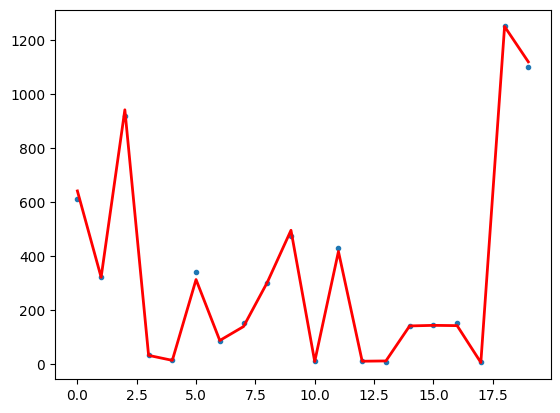

In [106]:
import matplotlib.pyplot as plt

x = np.arange(len(splits.train_x))[:20]

plt.plot(x, splits.train_y['Weight'].tolist()[:20], '.')
plt.plot(x, model.fittedvalues.tolist()[:20], 'r-', lw=2)

In [107]:
limit = 10
prediction = model.predict(splits.test_x.iloc[:limit], exog_smooth=splits.test_x.iloc[:limit], transform=True)
prediction

array([ 393.94876501,  121.60587299,  161.73118068,  148.16851481,
        578.13629514,  962.80396183,  640.03338069,  341.28248801,
       1041.81228725,  108.34885234])

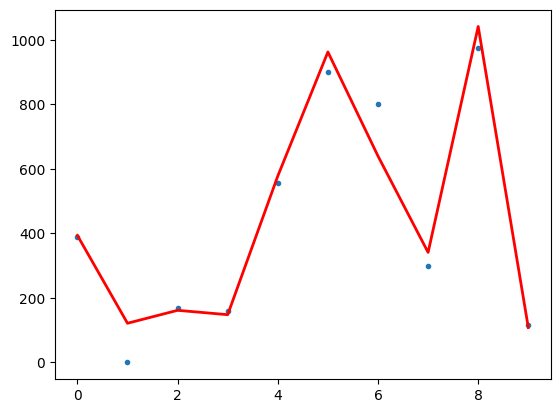

In [108]:
import matplotlib.pyplot as plt

x = np.arange(limit)

plt.plot(x, splits.test_y['Weight'].iloc[:limit].tolist(), '.')
plt.plot(x, prediction, 'r-', lw=2)